In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import imdb
max_features = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

C:\Users\Sang\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Sang\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
from tensorflow.keras.preprocessing import sequence
max_len = 100
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [9]:
x_train.shape

(25000, 500)

In [10]:
y_test.shape

(25000,)

In [11]:
y_train.shape

(25000,)

In [15]:
y_test[:10]

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [4]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [17]:
y_test_one_hot.shape

(25000, 2)

In [18]:
y_test_one_hot[0]

array([1., 0.], dtype=float32)

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [12]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 64))
model.add(layers.SimpleRNN(64, return_sequences=True))
model.add(layers.SimpleRNN(32))
# model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 651,426
Trainable params: 651,426
Non-trainable params: 0
_________________________________________________________________


In [13]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [14]:
history=model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 19s 123ms/step - loss: 0.6562 - acc: 0.5893 - val_loss: 0.5421 - val_acc: 0.7276
Epoch 2/10
157/157 [==============================] - 19s 122ms/step - loss: 0.3709 - acc: 0.8371 - val_loss: 0.4627 - val_acc: 0.7912
Epoch 3/10
157/157 [==============================] - 19s 122ms/step - loss: 0.1953 - acc: 0.9236 - val_loss: 0.5082 - val_acc: 0.8012
Epoch 4/10
157/157 [==============================] - 19s 121ms/step - loss: 0.0845 - acc: 0.9701 - val_loss: 0.7387 - val_acc: 0.7464
Epoch 5/10
157/157 [==============================] - 19s 121ms/step - loss: 0.0286 - acc: 0.9901 - val_loss: 1.0844 - val_acc: 0.7064
Epoch 6/10
157/157 [==============================] - 19s 120ms/step - loss: 0.0161 - acc: 0.9955 - val_loss: 1.0078 - val_acc: 0.7616
Epoch 7/10
157/157 [==============================] - 19s 121ms/step - loss: 0.0088 - acc: 0.9972 - val_loss: 1.0557 - val_acc: 0.7864
Epoch 8/10
157/157 [==============================] - 2

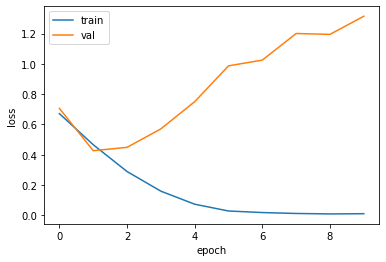

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(x_test,y_test_one_hot)

782/782 [==============================] - 10s 13ms/step - loss: 1.3143 - acc: 0.7426 9s - l  - ETA: 1s - loss: 1.3226 - acc: - ETA: 0s - loss: 1.3148 - 


In [11]:
print('test_acc:', test_acc)

test_acc: 0.7426400184631348
